In [10]:
import numpy as np
from fractions import Fraction
x1 = np.array([[-3/4,-1/4,-1/4],[1/4,-1/4,-1/4],[1/4,-1/4,3/4],[1/4,3/4,-1/4]]).transpose()
x1_trans = np.array([[-3/4,-1/4,-1/4],[1/4,-1/4,-1/4],[1/4,-1/4,3/4],[1/4,3/4,-1/4]])
x2 = np.array([[-1/4,-3/4,1/4],[-1/4,1/4,-3/4],[-1/4,1/4,1/4],[3/4,1/4,1/4]]).transpose()
x2_trans = np.array([[-1/4,-3/4,1/4],[-1/4,1/4,-3/4],[-1/4,1/4,1/4],[3/4,1/4,1/4]])

S1 = np.dot(x1,x1_trans)/3
x11 =  np.array([[0,0,0],[1,0,0],[1,0,1],[1,1,0]])
# x1conv = np.cov(x)
# S2 = np.dot(x2,x2_trans)
# print(x1)
print(np.cov(x1))
# print(x1_trans)
# print(S1)
# print(S2)
# xxx = np.array([[20,14,0,0],[14,10,0,0],[0,0,0,0],[0,0,0,0]])
aa = np.array([[2,4,0,0],[1,3,0,0]])
xxx = np.dot(aa,aa.T)
# xxx = np.array([[8,20],[5,13]])
print(xxx)
eigenvalue1, featurevector1 = np.linalg.eig(xxx)
print("特征值：", eigenvalue1)
print("特征向量：", featurevector1)

# eigenvalue2, featurevector2 = np.linalg.eig(S2)
# print("特征值：",eigenvalue2)
# print("特征向量：", featurevector2)

[[ 0.25        0.08333333  0.08333333]
 [ 0.08333333  0.25       -0.08333333]
 [ 0.08333333 -0.08333333  0.25      ]]
[[20 14]
 [14 10]]
特征值： [29.86606875  0.13393125]
特征向量： [[ 0.81741556 -0.57604844]
 [ 0.57604844  0.81741556]]


In [2]:
import numpy as np

w = np.array([0.187, 0.482, 0.179, -0.512, -0.524])
x = np.array([1, 1, 3, 4, 2])

c = np.dot(w.T, x)
c = 1 / (1 + np.exp(-c))
print(np.dot(w.T, x))

predicted_labels = [1,1,1,1,1,1]
labels = [1,0,1,0,0,0]
tp = [1 for p, l in zip(predicted_labels, labels) if p == 1 and l == 1]
print(tp)

-1.8900000000000001
[1, 1]


2
2
2
2
1
0
2
2
2
1
1
0


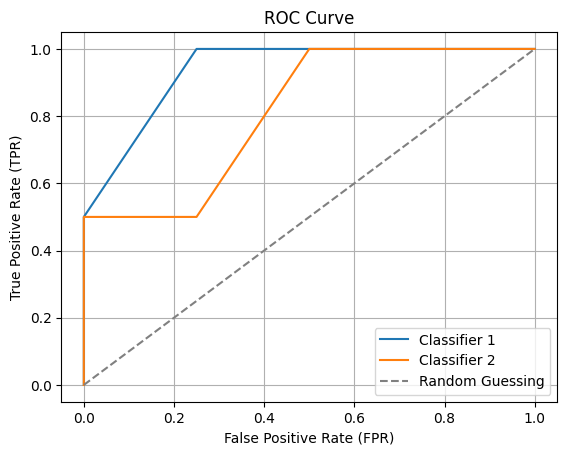

: 

In [14]:
import matplotlib.pyplot as plt

# 数据
labels = [1, 0, 1, 0, 0, 0]  # 真实标签，1表示正例，0表示负例
thres = [0, 0.2, 0.4, 0.6, 0.8, 1]
probs_classifier1 = [0.83, 0.78, 0.62, 0.48, 0.32, 0.22]  # 分类器1的预测概率
probs_classifier2 = [0.92, 0.62, 0.52, 0.49, 0.38, 0.28]  # 分类器2的预测概率


# 计算TPR和FPR
def calculate_tpr_fpr(labels, probs):
    thresholds = sorted(thres)
    tpr_list, fpr_list = [], []

    for thre in thresholds:
        predicted_labels = [1 if prob >= thre else 0 for prob in probs]
        tp = sum([1 for p, l in zip(predicted_labels, labels) if p == 1 and l == 1])
        # print(tp)
        # exit()
        fn = sum([1 for p, l in zip(predicted_labels, labels) if p == 0 and l == 1])
        fp = sum([1 for p, l in zip(predicted_labels, labels) if p == 1 and l == 0])
        tn = sum([1 for p, l in zip(predicted_labels, labels) if p == 0 and l == 0])

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return tpr_list, fpr_list


# 计算分类器1的TPR和FPR
tpr_classifier1, fpr_classifier1 = calculate_tpr_fpr(labels, probs_classifier1)

# 计算分类器2的TPR和FPR
tpr_classifier2, fpr_classifier2 = calculate_tpr_fpr(labels, probs_classifier2)

# 绘制ROC曲线
plt.plot(fpr_classifier1, tpr_classifier1, label="Classifier 1")
plt.plot(fpr_classifier2, tpr_classifier2, label="Classifier 2")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")

# 设置图形属性
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import numpy as np
# 将二维数据降成1维
# num = [-3/4,-1/4,-1/4],[1/4,-1/4,-1/4],[1/4,-1/4,3/4],[1/4,3/4,-1/4]
# num_array = np.array([[0,0,0],[1,0,0],[1,0,1],[1,1,0]])
num_array = np.array([[0,0,1],[0,1,0],[0,1,1],[1,1,1],[0,0,0],[1,0,0],[1,0,1],[1,1,0]])
print(num_array)
n1_avg, n2_avg, n3_avg = np.mean(num_array[:, 0]), np.mean(num_array[:, 1]), np.mean(num_array[:, 2])
# n1_avg, n2_avg, n3_avg = np.mean(num_array[:, 0]), np.mean(num_array[:, 1]), np.mean(num_array[:, 2])
# 1.样本中心化
# new_num_array = np.array(list(zip(num_array[:, 0] - n1_avg, num_array[:, 1] - n2_avg)))
new_num_array = np.c_[num_array[:, 0] - n1_avg, num_array[:, 1] - n2_avg, num_array[:, 2] - n3_avg]
print(new_num_array)
# 2.计算协方差矩阵
# num_cov1 = np.cov(new_num_array[:, 0], new_num_array[:, 1])
# ss = new_num_array[:,0:2]
# print(ss)
# num_cov2 = np.cov(ss.T)
# print(num_cov1)
# print(num_cov2)
# num_cov = np.cov(new_num_array.T)
num_cov = np.dot(new_num_array.T, new_num_array)/8
print(num_cov)
# 3.特征值分解
# a 特征值, b 特征向量
a, b = np.linalg.eig(num_cov)
# k=1, 取a最大值的索引对应b的特征向量
print(a)
print(b)
# w = b[:, np.argmax(a)]
# w = np.array([[0.81649658,0.40824829, 0.40824829],[0.22009329,-0.57088596,0.79097925]])
w = np.array([[1,0,0],[0,1,0]])
# print(w)
# 4.输出pca降维结果
# z1_num = new_num_array.dot(w.T)
z1_num = np.dot(w,new_num_array.T)
print(z1_num)
reconstruct_x1 = np.dot(w.T,z1_num)
print(reconstruct_x1)

# 使用sklearn中的PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z2_num = pca.fit_transform(num_array)
# print(z2_num)

[[0 0 1]
 [0 1 0]
 [0 1 1]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 0 1]
 [1 1 0]]
[[-0.5 -0.5  0.5]
 [-0.5  0.5 -0.5]
 [-0.5  0.5  0.5]
 [ 0.5  0.5  0.5]
 [-0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]]
[[0.25 0.   0.  ]
 [0.   0.25 0.  ]
 [0.   0.   0.25]]
[0.25 0.25 0.25]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-0.5 -0.5 -0.5  0.5 -0.5  0.5  0.5  0.5]
 [-0.5  0.5  0.5  0.5 -0.5 -0.5 -0.5  0.5]]
[[-0.5 -0.5 -0.5  0.5 -0.5  0.5  0.5  0.5]
 [-0.5  0.5  0.5  0.5 -0.5 -0.5 -0.5  0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]


In [9]:
# 导入所需的库
import numpy as np
from sklearn.linear_model import LogisticRegression

# 创建训练数据集
X_train = np.array([[5,3,1,1], [4,2,1,1], [2,1,2,3],[1,2,3, 2]])
y_train = np.array([1, 1,0,0])

# 创建逻辑回归模型并进行训练
model = LogisticRegression()
model.fit(X_train, y_train)

# 创建测试数据集
X_test = np.array([[1,3,4,2]])

print(model)
# 使用训练好的模型进行预测
y_pred = model.predict(X_test)

# 打印预测结果
print("预测结果:", y_pred)

LogisticRegression()
预测结果: [0]


In [11]:
a,b = 0.286,0
c = 0.5*(7*a**2+3*b**2+3*a*b) - 2*a -2*b
print(c)

-0.285714
